In [1]:
import numpy as np
import h5py
import time
import sys
from dataclasses import dataclass
import matplotlib.pyplot as plt

from src.emrikludge.orbits.nk_geodesic_orbit import BabakNKOrbit
from src.emrikludge.waveforms.nk_waveform import compute_nk_waveform, ObserverInfo

[NK Mapping] C++ extension loaded successfully. Acceleration ON 🚀


[Plot] Saved chunk_wave_check.png


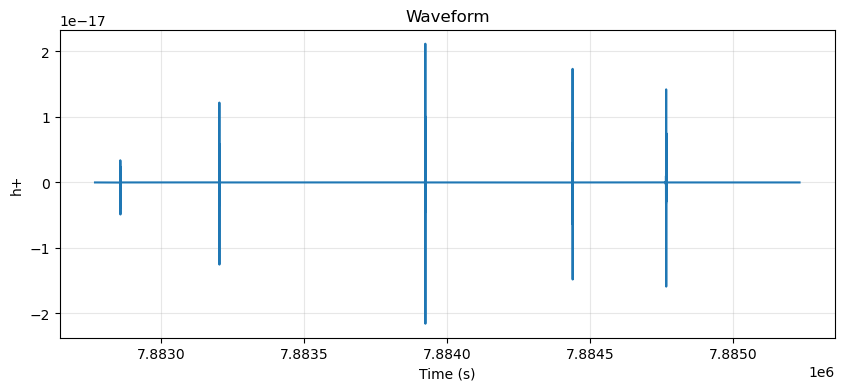

In [9]:
output_file = "emri_waveform_complete.h5"
M_BH_SOLAR = 1e6
mu_OBJ_SOLAR = 10.0
G_SI = 6.67430e-11
C_SI = 299792458.0
M_SUN_SI = 1.989e30
SEC_PER_YEAR = 31536000.0

M_BH_kg = M_BH_SOLAR * M_SUN_SI
T_unit_sec = G_SI * M_BH_kg / (C_SI**3)  # 约 4.925 秒 (对于 1e6 M_sun)
with h5py.File(output_file, "r") as f:
    length=len(f["t"])
    
    length_get=10000
    t_middle = f["t"][length//2 - length_get//2:length//2 + length_get//2]
    hp_middle = f["h_plus"][length//2 - length_get//2:length//2 + length_get//2]
    t_last = f["t"][-500:]
    hp_last = f["h_plus"][-500:]
    #把时间转换成国际单位制
    t_middle=t_middle*T_unit_sec
    
    plt.figure(figsize=(10, 4))
    plt.plot(t_middle, hp_middle)
    plt.title("Waveform")
    plt.xlabel("Time (s)")
    plt.ylabel("h+")
    plt.grid(True, alpha=0.3)
    plt.savefig("chunk_wave_check.png")
    print("[Plot] Saved chunk_wave_check.png")